In [ ]:
import scanpy as sc
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
adata = sc.datasets.pbmc3k()

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [ ]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [ ]:
adata.X

<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

This is a sparse matrix - so "almost empty". Just how empty is it really?

In [ ]:
total_positions = 2700 * 32738
empty_positions = np.sum(adata.X == 0)

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3550: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
empty_positions / total_positions * 100

97.41281057464086

In [ ]:
adata.X.max()

419.0

In [ ]:
adata.X.sum()

6390631.0

Now let's have a look at the gene IDs

In [ ]:
adata.var

,gene_ids
index,
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180


Now let's load the processed object and compare:

In [ ]:
processed = sc.datasets.pbmc3k_processed()

In [ ]:
processed

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
keep = adata.var.index.str.contains('mt-', case=False)
adata.var.index[keep]

Index(['INMT-FAM188B', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8',
       'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6',
       'MT-CYB'],
      dtype='object', name='index')

In [ ]:
mitochondrial = ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8',
       'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6',
       'MT-CYB']

In [ ]:
adata.var['mito'] = adata.var.index.isin(mitochondrial)

In [ ]:
adata.var

,gene_ids,mito
index,,
MIR1302-10,ENSG00000243485,False
FAM138A,ENSG00000237613,False
OR4F5,ENSG00000186092,False
RP11-34P13.7,ENSG00000238009,False
RP11-34P13.8,ENSG00000239945,False
...,...,...
AC145205.1,ENSG00000215635,False
BAGE5,ENSG00000268590,False
CU459201.1,ENSG00000251180,False


In [ ]:
rps = adata.var.index.str.contains('^RPS')
rpl = adata.var.index.str.contains('^RPL')
keep = rps | rpl
adata.var.index[keep]

Index(['RPL22', 'RPL11', 'RPS6KA1', 'RPS8', 'RPL5', 'RPS27', 'RPS10P7',
       'RPS6KC1', 'RPS7', 'RPS27A',
       ...
       'RPL18', 'RPL13A', 'RPS11', 'RPS9', 'RPL28', 'RPS5', 'RPS4Y1', 'RPS4Y2',
       'RPL3', 'RPS19BP1'],
      dtype='object', name='index', length=106)

In [ ]:
adata.var['ribo'] = rps | rpl

In [ ]:
keep = adata.var.index.str.contains('^MRPL')
adata.var.index[keep]

Index(['MRPL20', 'MRPL37', 'MRPL9', 'MRPL24', 'MRPL55', 'MRPL33', 'MRPL53',
       'MRPL19', 'MRPL35', 'MRPL30', 'MRPL30-1', 'MRPL44', 'MRPL3', 'MRPL47',
       'MRPL1', 'MRPL36', 'MRPL22', 'MRPL2', 'MRPL14', 'MRPL18', 'MRPL32',
       'MRPL15', 'MRPL13', 'MRPL50', 'MRPL41', 'MRPL43', 'MRPL23',
       'MRPL23-AS1', 'MRPL17', 'MRPL16', 'MRPL49', 'MRPL11', 'MRPL21',
       'MRPL48', 'MRPL51', 'MRPL42', 'MRPL52', 'MRPL46', 'MRPL28', 'MRPL45',
       'MRPL10', 'MRPL27', 'MRPL38', 'MRPL12', 'MRPL54', 'MRPL4', 'MRPL34',
       'MRPL40', 'MRPL39'],
      dtype='object', name='index')

In [ ]:
adata.var['mrpl'] = adata.var.index.str.contains('^MRPL')

In [ ]:
adata.var

,gene_ids,mito,ribo,mrpl
index,,,,
MIR1302-10,ENSG00000243485,False,False,False
FAM138A,ENSG00000237613,False,False,False
OR4F5,ENSG00000186092,False,False,False
RP11-34P13.7,ENSG00000238009,False,False,False
RP11-34P13.8,ENSG00000239945,False,False,False
...,...,...,...,...
AC145205.1,ENSG00000215635,False,False,False
BAGE5,ENSG00000268590,False,False,False
CU459201.1,ENSG00000251180,False,False,False


These are indicators _per gene_, but we would like to see how much of these groups are expressed _per cell_. To do this, we will use a convenient function included with ScanPy:

In [ ]:
sc.pp.calculate_qc_metrics(adata,
                           inplace=True,
                           percent_top=[25],
                           qc_vars=['mito', 'ribo', 'mrpl'])

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_25_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_mrpl', 'log1p_total_counts_mrpl', 'pct_counts_mrpl'
    var: 'gene_ids', 'mito', 'ribo', 'mrpl', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


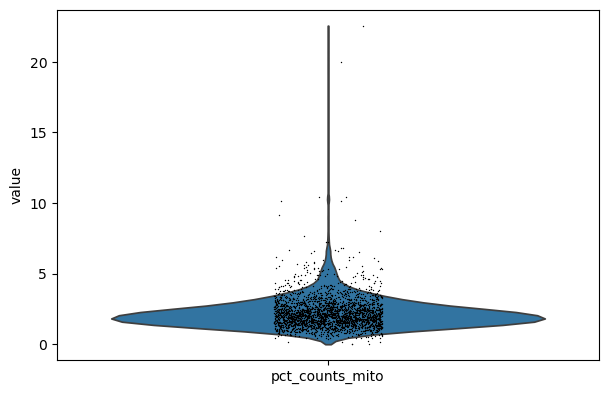

In [ ]:
sc.pl.violin(adata, 'pct_counts_mito', save='mito.png')

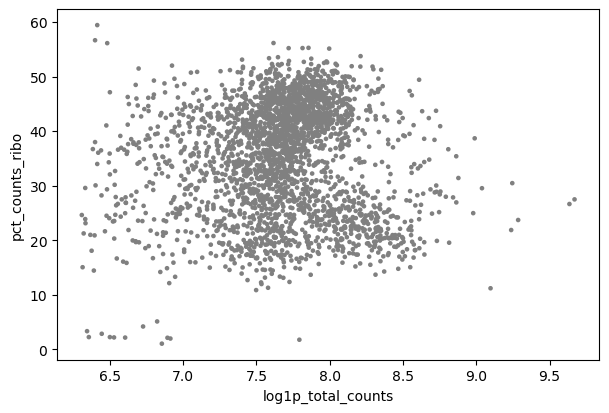

In [ ]:
sc.pl.scatter(adata, y='pct_counts_ribo', x='log1p_total_counts')